## Introduction to xarray
_analyzing data in NetCDF format with xarray_

In [1]:
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt

### Download the data

In [2]:
# Download the tar.gz file with wget

# defines the url for the data on figshare
DOWNLOAD_URL = 'https://ndownloader.figshare.com/files/17846429?private_link=97fe76d986848c93a5d0'

# defines what you want to call the output file
# the default name is cryptic, I suggest specifying something
OUTPUT_ZIP = 'datasets_1x1_mon_199801-201712.tar.gz'
    
# this runs wget from jupyter
# the output file will be in your local directory
!wget $DOWNLOAD_URL -O $OUTPUT_ZIP

--2019-09-30 12:05:18--  https://ndownloader.figshare.com/files/17846429?private_link=97fe76d986848c93a5d0
Resolving ndownloader.figshare.com (ndownloader.figshare.com)... 3.248.145.50, 34.250.0.169, 34.255.133.214, ...
Connecting to ndownloader.figshare.com (ndownloader.figshare.com)|3.248.145.50|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 118306093 (113M) [application/gzip]
Saving to: ‘datasets_1x1_mon_199801-201712.tar.gz’

100%[======================================>] 118,306,093 14.5MB/s   in 8.5s   

2019-09-30 12:05:27 (13.2 MB/s) - ‘datasets_1x1_mon_199801-201712.tar.gz’ saved [118306093/118306093]



### untar the data
- -z : tells tar this is a `.tar.gz` file
- -t : list the contents of the file
- -x : extract files from an archive
- -v : operate verbose
- -f : use the archive file listed afterwards

In [3]:
# shows the contents of the tar.gz
!tar -tf ./datasets_1x1_mon_199801-201712.tar.gz

./chl_1x1_mon_globColour_199801-201712.nc
./mld_1x1_clim_deBoyer_199801-201712.nc
./spco2_1x1_mon_SOCATv2019_199801-201712.nc
./sss_1x1_mon_EN421_199801-201712.nc
./sst_1x1_mon_NOAAOIv2_199801-201712.nc
./xco2_1x1_mon_globalview_199801-201712.nc


In [4]:
# extracts all the contents of the file 
!tar -zxvf datasets_1x1_mon_199801-201712.tar.gz

./chl_1x1_mon_globColour_199801-201712.nc
./mld_1x1_clim_deBoyer_199801-201712.nc
./spco2_1x1_mon_SOCATv2019_199801-201712.nc
./sss_1x1_mon_EN421_199801-201712.nc
./sst_1x1_mon_NOAAOIv2_199801-201712.nc
./xco2_1x1_mon_globalview_199801-201712.nc


# Open a single dataset
It is common practice to name xarray datasets `ds`, just like it is common practice to name pandas dataframe `df`

The only variable in this dataset is `spco2`. This is the partial pressure of CO2 in the surface of the ocean. It has three coordinates
- time
- lat
- lon

The beauty of netcdf and xarray is that it is "aware" of these dimensions. In a moment I will show the utility of this. Xarray is built on pandas, so the syntax will be very similar. 

In [5]:
# this opens the dataset
ds = xr.open_dataset('./spco2_1x1_mon_SOCATv2019_199801-201712.nc')

In [6]:
# this lists basic information about the dataset. 
# coordinates, variables names, and some attributes about the file
ds

<xarray.Dataset>
Dimensions:  (lat: 180, lon: 360, time: 240)
Coordinates:
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 0.5 1.5 2.5 3.5 4.5 ... 355.5 356.5 357.5 358.5 359.5
  * time     (time) datetime64[ns] 1998-01-15 1998-02-15 ... 2017-12-15
Data variables:
    spco2    (time, lat, lon) float32 ...
Attributes:
    contact:        Luke Gloege (gloege@ldeo.columbia.edu)
    creation_date:  21 September 2019
    notes:          original data, trimmed 1998-2017
    original_data:  https://www.socat.info/

In [7]:
# This lists more details
# units and maybe other information about the variable and coordinates
ds.info()

xarray.Dataset {
dimensions:
	lat = 180 ;
	lon = 360 ;
	time = 240 ;

variables:
	float32 spco2(time, lat, lon) ;
		spco2:long_name = Arithmetic mean of all fco2 recomputed values found in the grid cell. ;
		spco2:units = uatm ;
	float64 lat(lat) ;
		lat:units = degrees_north ;
	float64 lon(lon) ;
		lon:units = degrees_east ;
	datetime64[ns] time(time) ;

// global attributes:
	:contact = Luke Gloege (gloege@ldeo.columbia.edu) ;
	:creation_date = 21 September 2019 ;
	:notes = original data, trimmed 1998-2017 ;
	:original_data = https://www.socat.info/ ;
}

# Merge multiple files
This will take all the netcdf files and merge them into a single dataset

In [8]:
# this just deletes the old ds
del ds

In [9]:
# Data directory
# This is location where all the data files live
dir_data='/home/gloege/figshare'

# Observations dictionary
# I like to store data paths in a dict like this
dict_data = {'spco2': f'{dir_data}/spco2_1x1_mon_SOCATv2019_199801-201712.nc', 
             'sst': f'{dir_data}/sst_1x1_mon_NOAAOIv2_199801-201712.nc',
             'sss': f'{dir_data}/sss_1x1_mon_EN421_199801-201712.nc',
             'chl': f'{dir_data}/chl_1x1_mon_globColour_199801-201712.nc',
             'mld': f'{dir_data}/mld_1x1_clim_deBoyer_199801-201712.nc',
             'xco2': f'{dir_data}/xco2_1x1_mon_globalview_199801-201712.nc'}

#  Load all variables into common dataset
ds = xr.merge([xr.open_dataset(dict_data['sst']),
               xr.open_dataset(dict_data['sss']),
               xr.open_dataset(dict_data['chl']),
               xr.open_dataset(dict_data['mld']),
               xr.open_dataset(dict_data['xco2']),
               xr.open_dataset(dict_data['spco2'])])

In [11]:
ds.info()

xarray.Dataset {
dimensions:
	lat = 180 ;
	lon = 360 ;
	time = 240 ;

variables:
	float32 sst(time, lat, lon) ;
		sst:long_name = sea surface temperature ;
		sst:units = degC ;
	float32 lat(lat) ;
		lat:units = degrees_north ;
	float32 lon(lon) ;
		lon:units = degrees_east ;
	datetime64[ns] time(time) ;
	float32 sss(time, lat, lon) ;
		sss:long_name = sea surface salinity ;
		sss:units = psu ;
	float32 chl(time, lat, lon) ;
		chl:long_name = satellite-retrieved chlorophyll concentration ;
		chl:units = mg/m3 ;
	float32 mld(time, lat, lon) ;
		mld:long_name = mixed layer depth ;
		mld:units = meters ;
		mld:fill_value = 0 ;
		mld:description = repeating climatology. MLD with fixed temp. threshold criterion (0.2°C) ;
	float64 xco2(time, lat, lon) ;
		xco2:long_name = mixing ratio of atmospheric CO2 ;
		xco2:units = ppmv ;
		xco2:notes = monthly averages from weekly data ;
	float32 spco2(time, lat, lon) ;
		spco2:long_name = Arithmetic mean of all fco2 recomputed values found in the grid 

### Get a variable and plot it

In [13]:
# This extracts spco2 from the dataset and puts it into a dataarray
spco2 = ds['spco2']

In [18]:
print(f'Data type : {type(spco2)}')
print(f'Shape of the data : {spco2.shape}')

Data type : <class 'xarray.core.dataarray.DataArray'>
Shape of the data : (240, 180, 360)


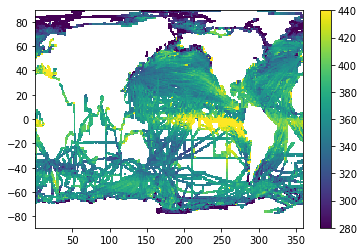

In [21]:
# Xarray is aware of dimensions.
# we can do a mean over time like this
spco2_mean = spco2.mean('time')

# and plot it
plt.pcolor(spco2_mean['lon'], spco2_mean['lat'], spco2_mean, vmin=280, vmax=440)
plt.colorbar()

# converting to numpy

In [26]:
np_spco2 = spco2.values

In [27]:
print(f'Data type : {type(np_spco2)}')
print(f'Shape of the data : {np_spco2.shape}')

Data type : <class 'numpy.ndarray'>
Shape of the data : (240, 180, 360)


# converting to pandas

In [28]:
df_spco2 = spco2.to_dataframe()

In [29]:
print(f'Data type : {type(df_spco2)}')
print(f'Shape of the data : {df_spco2.shape}')

Data type : <class 'pandas.core.frame.DataFrame'>
Shape of the data : (15552000, 1)


In [32]:
# display dataframe
df_spco2.reset_index().head()

,time,lat,lon,spco2
0,1998-01-15,-89.5,0.5,NaN
1,1998-01-15,-89.5,1.5,NaN
2,1998-01-15,-89.5,2.5,NaN
3,1998-01-15,-89.5,3.5,NaN
4,1998-01-15,-89.5,4.5,NaN


### All the data in pandas dataframe

In [33]:
df_data = ds.to_dataframe()

In [34]:
df_data.reset_index().head()

,lat,lon,time,sst,sss,chl,mld,xco2,spco2
0,-89.5,0.5,1998-01-15,NaN,NaN,NaN,NaN,NaN,NaN
1,-89.5,0.5,1998-02-15,NaN,NaN,NaN,NaN,NaN,NaN
2,-89.5,0.5,1998-03-15,NaN,NaN,NaN,NaN,NaN,NaN
3,-89.5,0.5,1998-04-15,NaN,NaN,NaN,NaN,NaN,NaN
4,-89.5,0.5,1998-05-15,NaN,NaN,NaN,NaN,NaN,NaN
